# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [55]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [56]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [57]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

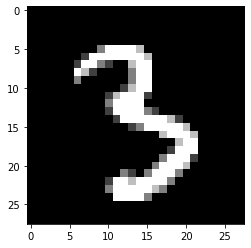

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.reshape(X_train[3456,:],(28,28)), cmap='gray')

Comment: Some of the Numbers are really hard to read, even for humans

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [60]:
# import models and metrics from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve

In [61]:
# initialize models
naive_bayes = GaussianNB()
simple_linear = linear_model.SGDClassifier(loss='log')
random_forest = RandomForestClassifier()

In [62]:
# train models
naive_bayes.fit(X_train, y_train)
simple_linear.fit(X_train,y_train)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
# compare accuracy score
print(accuracy_score(y_train,naive_bayes.predict(X_train)))
print(accuracy_score(y_train,simple_linear.predict(X_train)))
print(accuracy_score(y_train,random_forest.predict(X_train)))

0.55945
0.8742333333333333
1.0


In [64]:
# compare confusion matrix
print(confusion_matrix(y_train,naive_bayes.predict(X_train)), "\n")
print(confusion_matrix(y_train,simple_linear.predict(X_train)), "\n")
print(confusion_matrix(y_train,random_forest.predict(X_train)), "\n")


[[5407   11   32   18    6   12  169    6  200   95]
 [   4 6376   15   30    3    9   79    3  163   73]
 [ 606  163 1687  485   25   23 1485   16 1394   97]
 [ 377  305   46 2204   10   11  307   40 2186  616]
 [ 174   36   44   33  922   30  561   20 1236 2785]
 [ 679  140   29  121   28  235  305    9 3306  562]
 [  60   97   27    2    4   21 5560    0  126   10]
 [  26   36    5   61   43    4   21 1809  237 4014]
 [  96  712   23   48   17   29  102    6 3707 1063]
 [  31   33   19   11   30    3    2   81  115 5660]] 

[[5508    1  161   87    3   33   84    5   67    7]
 [   1 6505  134   35    3   20    9   18   25    5]
 [   4   11 5721   70   13   20   37   36   60    9]
 [   2    8  417 5422    1   95    6   39   57   55]
 [  11   35  521   59 4584   19  107   19  155  331]
 [  18    8  125  360   13 4522  124   14  160   70]
 [  15    6  157   10    5   74 5616    4   19    1]
 [  16   10  258   34   22    9    3 5614   25  265]
 [  19   94  843  529   11  289   50   21 3

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [65]:
# compute test accuracy
print(accuracy_score(y_test,naive_bayes.predict(X_test)))
print(accuracy_score(y_test,simple_linear.predict(X_test)))
print(accuracy_score(y_test,random_forest.predict(X_test)))

0.552
0.8578
0.9713


In [66]:
# compute f1 score
print(f1_score(y_test,naive_bayes.predict(X_test),average='micro'))
print(f1_score(y_test,simple_linear.predict(X_test),average='micro'))
print(f1_score(y_test,random_forest.predict(X_test),average='micro'))

0.552
0.8578
0.9713


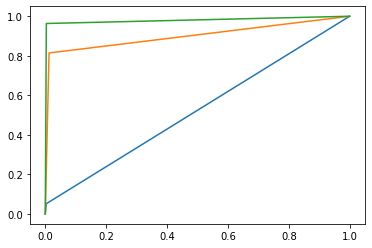

In [67]:
# plot ROC curves
y_true_5 = y_test == "5"
b5 = naive_bayes.predict(X_test) == "5"
l5 = simple_linear.predict(X_test) == "5"
r5 = random_forest.predict(X_test) == "5"
b5_fp, b5_tp, _ = roc_curve(y_true_5, b5)
l5_fp, l5_tp, _ = roc_curve(y_true_5, l5)
r5_fp, r5_tp, _ = roc_curve(y_true_5, r5)

plt.plot(b5_fp, b5_tp)
plt.plot(l5_fp, l5_tp)
plt.plot(r5_fp, r5_tp)